In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


Read Data

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data overview


In [3]:
#describe data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#check data set contain null value or not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#shape of data set
print('shape of data set',df.shape)
# number of feature
print('Number of feature',len(df.columns)-1)
# feature type
print(df.dtypes)

shape of data set (7043, 21)
Number of feature 20
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

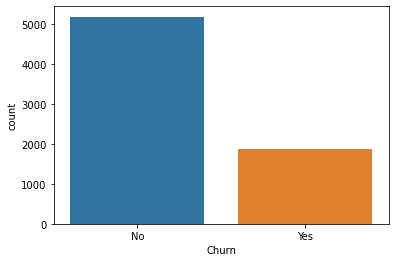

In [7]:
# check dataset balance or umbalance
sns.countplot(x='Churn',data=df)

### Data Preprocessing

> Feature Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
col=df.columns
categorical=[i for i in col if df[i].dtype==object]
print('categorical feature are',categorical)

le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])

categorical feature are ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [10]:
categorical=[i for i in col if df[i].dtype==object]
print('categorical feature are',categorical)

categorical feature are []


> Split Dataset

In [11]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:-1]
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)

> <font color='Blue'>Build model<font>

> AUC ROC Curve

In [12]:
def auc_roc(y_predict):
    from sklearn.metrics import roc_auc_score,roc_curve
    plt.figure(figsize=(10,5))
    fpr,tpr,_=roc_curve(y_test,y_predict)
    auc_score=roc_auc_score(y_test,y_predict)
    plt.plot(fpr,tpr,label='auc score= '+str(auc_score))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0,1],[0,1],'--')
    plt.title('AUC ROC Curve')
    plt.show()

> confusion matrix

In [13]:
def confusion_(y_predict):
    from sklearn.metrics import confusion_matrix
    plt.figure(figsize=(10,5))
    confusion=confusion_matrix(y_test,y_predict)
    norm_cm = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
    sns.heatmap(norm_cm,annot=confusion,center =2.2,fmt='2g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'])
    plt.title('confusion matrix')
    plt.show()

> Random Forest

train accuracy 1.0
test accuracy 0.7950028392958546


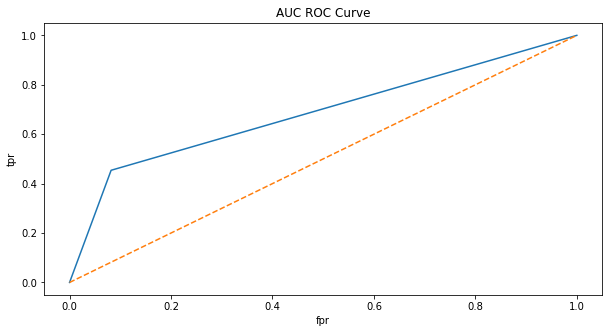

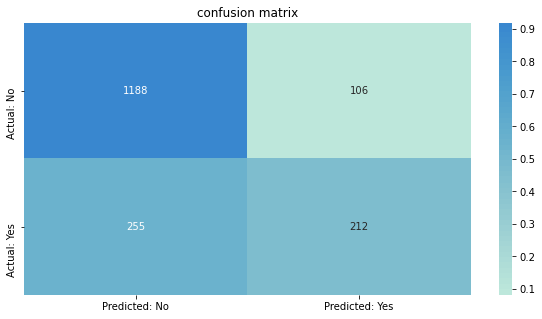

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
print('train accuracy',model.score(x_train,y_train))
y_predict=model.predict(x_test)
print('test accuracy',accuracy_score(y_test,y_predict))
auc_roc(y_predict)
confusion_(y_predict)

> Logistic Regression

train accuracy 0.7953426732298372
test accuracy 0.7950028392958546


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


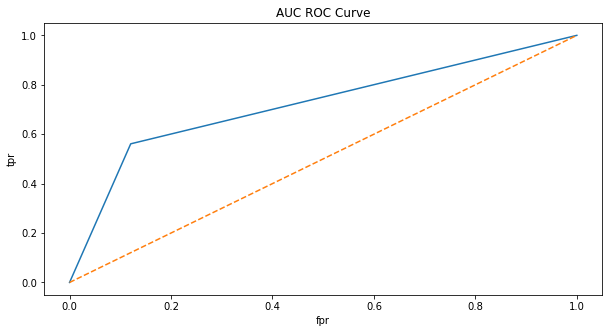

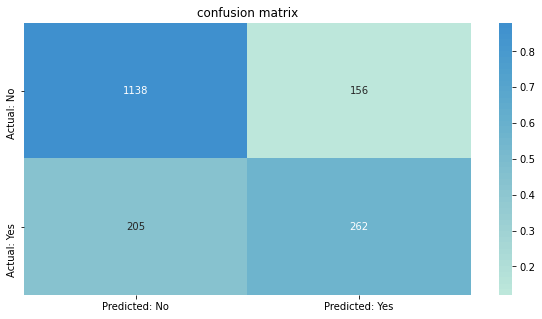

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
print('train accuracy',model.score(x_train,y_train))
y_predict=model.predict(x_test)
print('test accuracy',accuracy_score(y_test,y_predict))
auc_roc(y_predict)
confusion_(y_predict)

> KNN

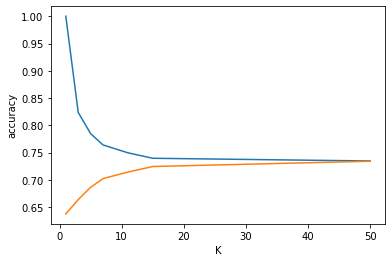

[1.0, 0.8237410071942446, 0.7847406285497918, 0.764104505868989, 0.7497160166603559, 0.7396819386595986, 0.7347595607724347]
[0.6377058489494606, 0.6638273708120386, 0.686541737649063, 0.7024417944349801, 0.7143668370244179, 0.7245883021010789, 0.7342419080068143]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=[1,3,5,7,11,15,50]
test_acc=[]
train_acc=[]
for i in n_neighbors:    
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train_acc_score=model.score(x_train,y_train)
    #print('train accuracy',train_acc_score)
    train_acc.append(train_acc_score)
    y_predict=model.predict(x_test)
    test_acc_score=accuracy_score(y_test,y_predict)
    #print('test accuracy',test_acc_score)
    test_acc.append(test_acc_score)
plt.plot(n_neighbors,train_acc,label='train accuracy')
plt.plot(n_neighbors,test_acc,label='test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()
print(train_acc)
print(test_acc)

train accuracy 0.7413858386974631
test accuracy 0.7217490062464509


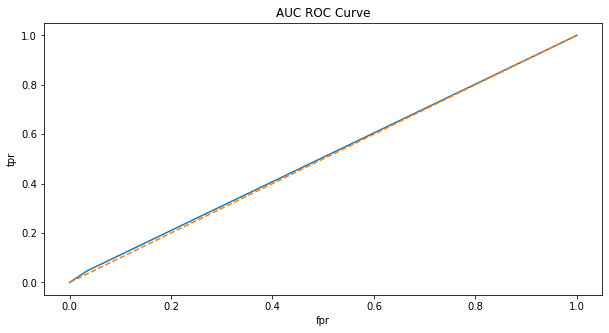

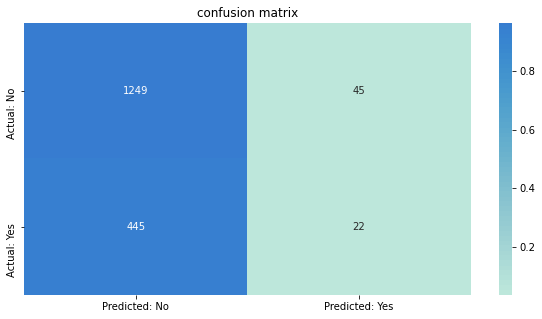

In [17]:
k=13
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)
train_acc_score=model.score(x_train,y_train)
print('train accuracy',train_acc_score)
y_predict=model.predict(x_test)
test_acc_score=accuracy_score(y_test,y_predict)
print('test accuracy',test_acc_score)
auc_roc(y_predict)
confusion_(y_predict)